In [4]:
from nilearn import datasets
from nilearn import input_data
import numpy as np
import matplotlib.pylab as plt
from nilearn.plotting import plot_prob_atlas
from nilearn.plotting import plot_stat_map, show


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
subList =  ['008', '1253' , '1293' ,'1307','1322','1339','1343','1387'] #'1223'
midSubList = ['1253','1263','1351','1364','1369','1390','1403']

subject_list = np.concatenate([subList,midSubList])
rest_files_1 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-1/func/sub-%s_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,sub) for sub in subList]

confound_files_1 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-1/func/sub-%s_ses-1_task-rest_desc-confounds_regressors.tsv' % (sub,sub) for sub in subList]


rest_files_2 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-2/func/sub-%s_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,sub) for sub in subList]

confound_files_2 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-2/func/sub-%s_ses-2_task-rest_desc-confounds_regressors.tsv' % (sub,sub) for sub in subList]
kpe_label = [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0]

rest_files = np.concatenate([rest_files_1, rest_files_2])
confound_files = np.concatenate([confound_files_1, confound_files_2])

In [10]:
def removeVars (confoundFile):
    import pandas as pd
    confound = pd.read_csv(confoundFile,sep="\t", na_values="n/a")
    finalConf = confound[['csf', 'white_matter', 'global_signal',
                          'a_comp_cor_00', 'a_comp_cor_01',	'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 
                        'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']]
 
    return finalConf


In [6]:
pcc_coords = [(0, -52, 18)]

In [9]:

seed_masker = input_data.NiftiSpheresMasker(
    pcc_coords, radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=1.,
    memory="/home/oad4/scratch60/nilearn", memory_level=1, verbose=0)

In [11]:
func_filename = rest_files_1[0]
confound_filename = removeVars(confound_files_1[0])

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [13]:
seed_time_series = seed_masker.fit_transform(func_filename,
                                             confounds=[confound_filename.values])

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [14]:
brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=6,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=1.,
    memory="/home/oad4/scratch60/nilearn", memory_level=1, verbose=0)

In [15]:
brain_time_series = brain_masker.fit_transform(func_filename,
                                               confounds=[confound_filename.values])

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/home/oad4/scratch60/nilearn'", use "location='/home/oad4/scratch60/nilearn'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib

In [16]:
print("Seed time series shape: (%s, %s)" % seed_time_series.shape)
print("Brain time series shape: (%s, %s)" % brain_time_series.shape)

Seed time series shape: (580, 1)
Brain time series shape: (580, 830279)


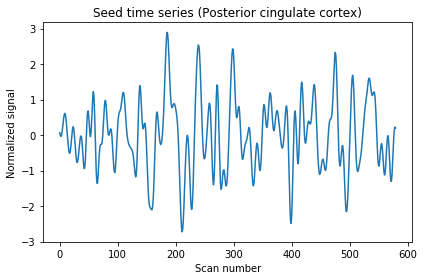

In [17]:
plt.plot(seed_time_series)
plt.title('Seed time series (Posterior cingulate cortex)')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()

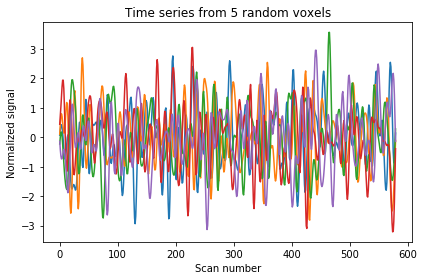

In [18]:
plt.plot(brain_time_series[:, [10, 45, 100, 5000, 10000]])
plt.title('Time series from 5 random voxels')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()

In [19]:
seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )

In [20]:
print("Seed-to-voxel correlation shape: (%s, %s)" %
      seed_to_voxel_correlations.shape)
print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (
    seed_to_voxel_correlations.min(), seed_to_voxel_correlations.max()))

Seed-to-voxel correlation shape: (830279, 1)
Seed-to-voxel correlation: min = -0.645; max = 0.864


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


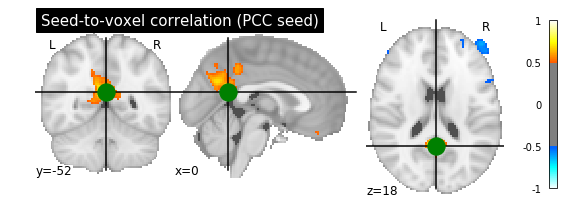

In [21]:
from nilearn import plotting

seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T)
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=pcc_coords[0],
                                 title="Seed-to-voxel correlation (PCC seed)"
                                 )
display.add_markers(marker_coords=pcc_coords, marker_color='g',
                    marker_size=300)

In [22]:
seed_to_voxel_correlations_fisher_z = np.arctanh(seed_to_voxel_correlations)
print("Seed-to-voxel correlation Fisher-z transformed: min = %.3f; max = %.3f"
      % (seed_to_voxel_correlations_fisher_z.min(),
         seed_to_voxel_correlations_fisher_z.max()
         )
      )

Seed-to-voxel correlation Fisher-z transformed: min = -0.767; max = 1.308


In [33]:
from nilearn import plotting, image

msdl_data = datasets.fetch_atlas_msdl()
atlas_filename = msdl_data.maps
msdl_coords = msdl_data.region_coords
dmn_coord = msdl_data.networks
print(image.index_img(atlas_filename, 4))

<class 'nibabel.nifti1.Nifti1Image'>
data shape (40, 48, 35)
affine: 
[[   4.    0.    0.  -78.]
 [   0.    4.    0. -111.]
 [   0.    0.    4.  -51.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 40 48 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 4. 4. 4. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.58604854
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/numpy/lib/npyio.py:2315: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
